<a href="https://colab.research.google.com/github/taavip/MAPlaneeringud/blob/main/plan_analyys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [335]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+https://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Cloning https://github.com/geopandas/geopandas.git to /tmp/pip-req-build-yuphdy9u
  Running command git clone -q https://github.com/geopandas/geopandas.git /tmp/pip-req-build-yuphdy9u
CPU times: user 224 ms, sys: 111 ms, total: 335 ms
Wall time: 22.2 s


In [336]:
pip install owslib

In [337]:
import pandas as pd
import numpy as np
import re
import sklearn
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

# URL for WFS backend
url = "https://gsavalik.envir.ee/geoserver/planeeringud/ows?service=WFS"

# Initialize
wfs = WebFeatureService(url=url)

# Get data from WFS
# -----------------

# Fetch the last available layer (as an example) --> 'vaestoruutu:vaki2017_5km'
layers = list(wfs.contents)
layer = layers[3]

# Specify the parameters for fetching the data
params = dict(service='WFS', version="1.1.0", request='GetFeature',
      typeName=layer, outputFormat='json')

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

# Read data from URL
data = gpd.read_file(q)

In [338]:
layers

['planeeringud:detail_plan_juurdep',
 'planeeringud:detail_plan_sund',
 'planeeringud:detail_plan_avalik',
 'planeeringud:detail_plan_ala',
 'planeeringud:detail_plan_haljastus',
 'planeeringud:detail_plan_hoonestus',
 'planeeringud:detail_plan_kktingimus',
 'planeeringud:detail_plan_krunt',
 'planeeringud:detail_plan_kuja',
 'planeeringud:detail_plan_maapar',
 'planeeringud:detail_plan_rajatis',
 'planeeringud:detail_plan_servituut',
 'planeeringud:detail_plan_transp',
 'planeeringud:detail_plan_tehno',
 'planeeringud:detail_plan_tingimus',
 'planeeringud:detail_plan_valveplaan',
 'planeeringud:detail_plan_valveplaan_osa',
 'planeeringud:ehak_tiheasustus',
 'planeeringud:rb_planeeringutrass',
 'planeeringud:yld_plan_ala',
 'planeeringud:yld_plan_juurdep',
 'planeeringud:detail_plan_koko',
 'planeeringud:yld_plan_jaade',
 'planeeringud:yld_plan_kktingimus',
 'planeeringud:yld_plan_maakas',
 'planeeringud:yld_plan_vaartmiljoo',
 'planeeringud:yld_plan_ala_osa',
 'planeeringud:maaamet__r

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff34dc44610>,
      dtype=object)

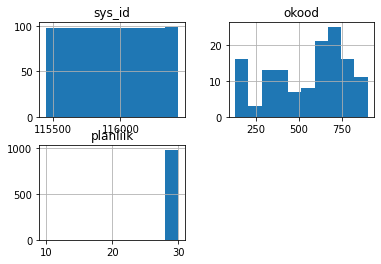

In [339]:
data.hist()


In [340]:
data["vastuvkp"] = data["vastuvkp"].astype("datetime64")

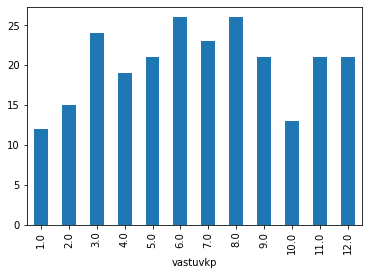

In [341]:
data["vastuvkp"].groupby(data["vastuvkp"].dt.month).count().plot(kind="bar")

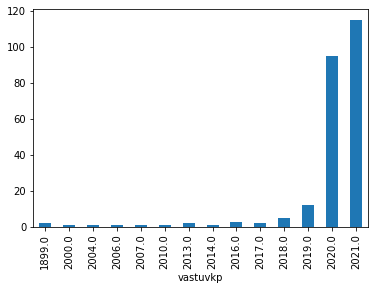

In [342]:
data["vastuvkp"].groupby(data["vastuvkp"].dt.year).count().plot(kind="bar")

In [343]:
data

,id,sys_id,planid,dp_kiht,oid,okood,plannim,planliik,planliik_vaste,planeesm,planseis,planseis_vaste,algatkp,vastuvkp,kehtestkp,planksh,planviide,muutkp,muutnr,seos_ma,arhiiv_digi,avalik,plan_kihid,yp_muutev,allikas,stamp_upd,geometry
0,detail_plan_ala.0,115448,90412,DP_plan_ala,1,714.0,Laratsi II detailplaneering,30,Detailplaneering,Detailplaneeringu eesmärgiks on ehitusõiguse m...,10,Planeering on kehtiv,2019-06-28,2020-09-08,2021-01-26,None,https://gis.saaremaavald.ee/failid/DP/DP-19-002/,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((396038.110 6486828.740, 396335.080 6..."
1,detail_plan_ala.1,115449,88092,DP_plan_ala,18,353.0,"Andineeme külas, Tülivere ühistu 26 ja Tüliver...",10,Maakonnaplaneering; sh osa hõlmav ja teemaplan...,Kahe elamu krundi moodustamine. Maatükid kokku...,10,Planeering on kehtiv,2020-07-02,2020-12-31,2021-02-25,None,https://xgis.maaamet.ee/xgis2/page/app/maainfo,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((582116.026 6595820.950, 582100.958 6..."
2,detail_plan_ala.2,115450,92752,DP_plan_ala,3,198.0,Ilmandu külas Tarna tee 1 maaüksuse ja lähiala...,30,Detailplaneering,Detailplaneeringu koostamise eesmärgiks on sel...,10,Planeering on kehtiv,2016-12-15,2020-05-28,2021-02-16,None,https://harku.maps.arcgis.com/apps/webappviewe...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((527095.582 6588911.951, 527021.498 6..."
3,detail_plan_ala.3,115451,80372,DP_plan_ala,1,NaN,Meierei tn 36 kinnistu ja lähiala detailplanee...,30,Detailplaneering,Detailplaneeringu koostamise eesmärgiks on kin...,10,Planeering on kehtiv,2019-02-11,2021-02-22,2021-05-24,None,http://atp.amphora.ee/raasikuvv/index.aspx?itm...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-12-10,"POLYGON ((567673.829 6581797.095, 567584.551 6..."
4,detail_plan_ala.4,115452,95092,DP_plan_ala,7,NaN,Matise detailplaneering,30,Detailplaneering,Elamukruntidele ehitusõiguse määramine ehitusk...,10,Planeering on kehtiv,2020-02-28,2021-02-26,2021-08-27,None,https://www.saaremaavald.ee/detailplaneeringud...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,jah,MA sisestatud,2021-12-10,"POLYGON ((377561.276 6465387.797, 377559.189 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,detail_plan_ala.976,116424,102036,DP_plan_ala,28,NaN,"Kinnistute Sepamäe tee 13, Sepamäe tee 15 ja S...",30,Detailplaneering,Kinnistute jagamine ning ehitusõiguse määramin...,10,Planeering on kehtiv,2020-09-16,2021-06-30,2021-12-15,None,None,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2022-01-10,"POLYGON ((549230.630 6601399.070, 549289.730 6..."
977,detail_plan_ala.977,116425,101172,DP_plan_ala,10,NaN,Kõrgemaa kinnistu detailplaneering,30,Detailplaneering,Kinnistu jagamine loodusliku maa ja elamumaa k...,10,Planeering on kehtiv,2020-05-27,2021-03-24,2021-10-20,None,None,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2022-01-11,"POLYGON ((547669.350 6597654.390, 547742.660 6..."
978,detail_plan_ala.978,116426,92034,DP_plan_ala,11,NaN,Kinnistu Tammenurme tee 5 detailplaneering,30,Detailplaneering,Ehitusõiguse määramine kaksikelamule,10,Planeering on kehtiv,2020-11-18,2021-04-14,2021-10-20,None,None,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2022-01-11,"POLYGON ((551381.580 6598253.250, 551430.6

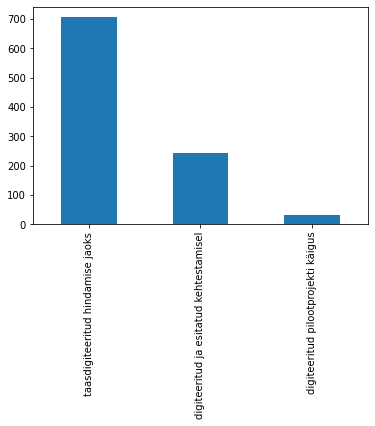

In [344]:
data["plan_kihid"].value_counts()[:10].plot(kind='bar')

In [345]:
#pd.unique(data["vastuvkp"])

# Krunt

In [346]:
layer = layers[7]

# Specify the parameters for fetching the data
params = dict(service='WFS', version="1.1.0", request='GetFeature',
      typeName=layer, outputFormat='json')

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

# Read data from URL
krunt = gpd.read_file(q)

In [347]:
krunt

,id,sys_id,planid,objectid,dp_kiht,oid,okood,otstarve,tingimus,pind,tahis,nimetus,parkimis_arv,allikas,stamp_upd,geometry
0,detail_plan_krunt.0,632220,1182,2,DP_krunt,1,725.0,Maatulundusmaa 65; Elamumaa 35,None,NaN,M65; EE35,None,None,MA sisestatud,2021-11-17,"POLYGON ((524122.900 6561694.600, 524188.250 6..."
1,detail_plan_krunt.1,632221,1182,1,DP_krunt,2,725.0,Maatulundusmaa 65; Elamumaa 35,None,NaN,M65; EE35,None,None,MA sisestatud,2021-11-17,"POLYGON ((524112.940 6561816.240, 524188.250 6..."
2,detail_plan_krunt.2,632222,1180,3,DP_krunt,1,725.0,Elamumaa,None,2629.0,E;,None,None,MA sisestatud,2021-11-17,"POLYGON ((521111.910 6564343.720, 521135.100 6..."
3,detail_plan_krunt.3,632223,1180,12,DP_krunt,5,725.0,Elamumaa,None,1142.0,E;,None,None,MA sisestatud,2021-11-17,"POLYGON ((520995.350 6564304.020, 521016.370 6..."
4,detail_plan_krunt.4,632224,1180,üldmaa,DP_krunt,16,725.0,Üldkasutatav maa,None,10187.0,Ü;,None,None,MA sisestatud,2021-11-17,"POLYGON ((521016.840 6564426.160, 521063.110 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4252,detail_plan_krunt.4252,636472,93593,4,DP_krunt,10,890.0,Tee ja tänava maa,None,4211.0,LT,None,None,MA sisestatud,2021-11-17,"POLYGON ((550259.305 6595861.123, 550269.825 6..."
4253,detail_plan_krunt.4253,636473,93593,5,DP_krunt,9,890.0,Tee ja tänava maa,None,3408.0,LT,None,None,MA sisestatud,2021-11-17,"POLYGON ((550148.620 6595938.490, 550159.950 6..."
4254,detail_plan_krunt.4254,636474,93593,2,DP_krunt,6,890.0,Looduslik maa,None,3261.0,HL,None,None,MA sisestatud,2021-11-17,"POLYGON ((550259.305 6595861.123, 550273.370 6..."
4255,detail_plan_krunt.4255,636475,90412,2,DP_krunt,4,NaN,Maatulundusmaa,None,39176.0,M;,Pos2,None,MA sisestatud,2021-11-17,"POLYGON ((396201.833 6486848.786, 396335.080 6..."


In [348]:
soid=0
df = pd.DataFrame()

for i in krunt.index.values.tolist():
  #print(krunt.iloc[i])
  if (krunt.iloc[i].otstarve is not None):
    so_arv = len(krunt.iloc[i].otstarve.split(";"))
  else:
    so_arv = 1
  
  for j in range(so_arv):
    df.at[soid, 'index'] = i
    df.at[soid, 'oid'] = int(krunt.iloc[i].oid)
    df.at[soid, 'index'] = krunt.iloc[i].planid
    df.at[soid, 'algne_otstarve'] = krunt.iloc[i].otstarve
    df.at[soid, 'algne_tahis'] = krunt.iloc[i].tahis
    df.at[soid, 'so_arv'] = so_arv
    if (krunt.iloc[i].otstarve is not None):
      s = krunt.iloc[i].otstarve.split(";")[j]
      df.at[soid, 'otstarve'] = s
      df.at[soid, 'numbers'] = sum(c.isdigit() for c in s)
      df.at[soid, 'letters'] = sum(c.isalpha() for c in s)
      df.at[soid, 'spaces']  = sum(c.isspace() for c in s)
      df.at[soid, 'upper']  = sum(c.isupper() for c in s)
      df.at[soid, 'others']  = len(s) - df.iloc[soid].numbers - df.iloc[soid].letters - df.iloc[soid].spaces
    if (krunt.iloc[i].tahis is not None):
      #if (krunt.iloc[i].tahis.split(";")[j] is not None):
      if so_arv>len(krunt.iloc[i].tahis.split(";")) and j+1>len(krunt.iloc[i].tahis.split(";")):
        df.at[soid, 'tahis'] = np.nan
      else:
        df.at[soid, 'tahis'] = krunt.iloc[i].tahis.split(";")[j]
    soid=soid+1


df["index"] = df["index"].astype(float).astype(int)
df["oid"] = df["oid"].astype(float).astype(int)
df["so_arv"] = df["so_arv"].astype(float).astype(int)
df["numbers"] = df["numbers"].fillna(0).astype(float).astype(int)
df["letters"] = df["letters"].fillna(0).astype(float).astype(int)
df["spaces"] = df["spaces"].fillna(0).astype(float).astype(int)
df["upper"] = df["upper"].fillna(0).astype(float).astype(int)
df["others"] = df["others"].fillna(0).astype(float).astype(int)
df


,index,oid,algne_otstarve,algne_tahis,so_arv,otstarve,numbers,letters,spaces,upper,others,tahis
0,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65
1,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35
2,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65
3,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35
4,1180,1,Elamumaa,E;,1,Elamumaa,0,8,0,1,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...
5115,93593,10,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT
5116,93593,9,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT
5117,93593,6,Looduslik maa,HL,1,Looduslik maa,0,12,2,1,0,HL
5118,90412,4,Maatulundusmaa,M;,1,Maatulundusmaa,0,14,1,1,0,M


In [349]:
def strip_element1(my_list):
  return list(filter(lambda x: x.replace('=','').replace('<','').replace('>','').replace('%','') != "", [x.replace('=','').replace('<','').replace('>','').replace('%','') for x in my_list]))

In [350]:
def strip_element(my_list):
  return list(filter(lambda x: re.sub('maa-ala$', '', re.sub('maa$', '', x.strip())).replace('=','').replace('<','').replace('>','').replace('%','').replace('–','').replace('-','').strip().replace(' ma','').strip() != "", [re.sub('maa-ala$', '', re.sub('maa$', '', x.strip())).replace('=','').replace('<','').replace('>','').replace('%','').replace('–','').replace('-','').strip() for x in my_list]))

In [351]:
df["otstarve_l"] = df["otstarve"].str.split(r'(\d+)')
#df["otstarve_l"] = df["otstarve_l"].str.strip()
for row in df.loc[df.otstarve_l.isnull(), 'otstarve_l'].index:
    df.at[row, 'otstarve_l'] = []

df['otstarve_l']=df['otstarve_l'].apply(strip_element1)
df["otstarve_ll"] = df["otstarve_l"].str.len()
df["otstarve_ll"] = df["otstarve_ll"].fillna(0).astype(float).astype(int)
df

,index,oid,algne_otstarve,algne_tahis,so_arv,otstarve,numbers,letters,spaces,upper,others,tahis,otstarve_l,otstarve_ll
0,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,"[Maatulundusmaa , 65]",2
1,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35,"[ Elamumaa , 35]",2
2,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,"[Maatulundusmaa , 65]",2
3,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Elamumaa 35,2,8,2,1,0,EE35,"[ Elamumaa , 35]",2
4,1180,1,Elamumaa,E;,1,Elamumaa,0,8,0,1,0,E,[Elamumaa],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,93593,10,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT,[Tee ja tänava maa ],1
5116,93593,9,Tee ja tänava maa,LT,1,Tee ja tänava maa,0,14,4,1,0,LT,[Tee ja tänava maa ],1
5117,93593,6,Looduslik maa,HL,1,Looduslik maa,0,12,2,1,0,HL,[Looduslik maa ],1
5118,90412,4,Maatulundusmaa,M;,1,Maatulundusmaa,0,14,1,1,0,M,[Maatulundusmaa ],1


In [352]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])



In [385]:
import string 
import re
count_so=to_1D(df["otstarve_l"]).value_counts().to_frame('count')
count_so['len']=count_so.index.str.len()
count_so['num']=count_so.index.str.isnumeric()
count_so['comma']=count_so.index.str.count(",")
count_so['slash']=count_so.index.str.count("/")
count_so['percent']=count_so.index.str.count("%")
count_so['braket']= count_so.index.str.count('\(') + count_so.index.str.count('\)')
count_so['punktu']= count_so.index.str.count(f'[{re.escape(string.punctuation)}]')
count_so['maa']= count_so.index.str.count('maa')
count_so['maa-ala']= count_so.index.str.count('maa-ala')
count_so['hoone']= count_so.index.str.count('hoone')
count_so['ehitis']= count_so.index.str.count('ehitis')
count_so['rajatis']= count_so.index.str.count('rajatis')
count_so['ots_l']=count_so.index.str.lower().str.replace('sat-siooni','satsiooni').str.replace('hoonete','').str.replace('hoone','').str.replace('ehititste','').str.replace('ehitiste','').str.replace('ehitise','').str.replace('rajatise','').str.replace('rajatiste','').str.replace('ja/','').str.replace(' maa-ala','').str.replace('y','ü').str.replace('/',';').str.replace('%','').str.replace('\n','').str.replace('=','').str.replace('≥','').str.replace('≤','').str.replace('<','').str.replace('>','').str.replace('bt bb', 'bt;bb').str.replace('ja ', ';').str.replace(',', ';').str.replace('…', ';').str.replace('.', ';').str.replace('(', ';').str.replace(')', ';').str.replace('või', ';').str.replace('vähemalt', ';').str.replace('kuni', ';').str.replace('max', ';').str.replace('min', ';').str.strip(' ').str.replace('-',';')
count_so['ots_l']=count_so['ots_l'].str.split(';')
count_so['ots_l']=count_so['ots_l'].apply(strip_element)
count_so

,count,len,num,comma,slash,percent,braket,punktu,maa,maa-ala,hoone,ehitis,rajatis,ots_l
,1787,1,False,0,0,0,0,0,0,0,0,0,0,[]
100,1136,3,True,0,0,0,0,0,0,0,0,0,0,[100]
Ä,674,2,False,0,0,0,0,0,0,0,0,0,0,[ä]
EK,479,3,False,0,0,0,0,0,0,0,0,0,0,[ek]
Elamumaa,379,9,False,0,0,0,0,0,1,0,0,0,0,[elamu]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BT BB,1,7,False,0,0,0,0,0,0,0,0,0,0,"[bt, bb]"
Ä ja/või EK,1,12,False,0,1,0,0,1,0,0,0,0,0,"[ä, ek]"
Korruselamute maa,1,19,False,0,0,0,0,0,1,0,0,0,0,[korruselamute]
7,1,1,True,0,0,0,0,0,0,0,0,0,0,[7]


In [386]:
test=to_1D(count_so["ots_l"]).to_frame('index')
test.value_counts()

index       
kaubandus       26
tootmis         25
teenindus       23
äri             20
toitlustus      19
                ..
tt               1
lasteasutuse     1
lb               1
tootmis ma       1
0                1
Length: 174, dtype: int64

In [387]:

test=to_1D(count_so["ots_l"]).to_frame('index')
#test.reset_index(inplace=True)




test.loc[test['index'].str.len()<=3, 'type'] = 'ly'
test.loc[test['index'].str.len()>3, 'type'] = 'so'
test.loc[test['index'].str.isnumeric(), 'type'] = 'num'
test.loc[test['index'] == 'äri', 'type'] = 'so'
test.loc[test['index'] == 'tee', 'type'] = 'so'
test.loc[test['index'] == 'lao', 'type'] = 'so'
test

,index,type
0,100,num
1,ä,ly
2,ek,ly
3,elamu,so
4,elamu,so
...,...,...
558,ä,ly
559,ek,ly
560,korruselamute,so
561,7,num


In [388]:
!pip install string-grouper

In [389]:
from string_grouper import match_strings, match_most_similar, group_similar_strings, StringGrouper
# Add the grouped strings
test['dd']=group_similar_strings(test['index'],ignore_index=True,min_similarity=0.65)
# Show items with most duplicates
test.groupby('dd')['index'].apply(list).to_frame()

,index
dd,
0,[0]
10,[10]
100,"[100, 1000]"
12,[12]
14,[14]
...,...
üksikelamu,"[üksikelamu, üksikelamu, üksikelamu, üksikelam..."
üld,[üld]
üldkasutatav,"[üldkasutatav, üldkasutatav, üldkasuatav, üldk..."


In [390]:
#df1 = pd.DataFrame(columns = ['len', 'min_similarity'])
#for i in  range(100):
#  test['dd']=group_similar_strings(test['index'],ignore_index=True,min_similarity=(i/100))
#  df1 = df1.append({'min_similarity' : i/100, 'len' : len(test.groupby('dd').count())}, 
#                ignore_index = True)
#df1.plot.line(x='min_similarity', grid=True)
  


In [391]:
test

,index,type,dd
0,100,num,100
1,ä,ly,ä
2,ek,ly,ek
3,elamu,so,elamu
4,elamu,so,elamu
...,...,...,...
558,ä,ly,ä
559,ek,ly,ek
560,korruselamute,so,korruselamu
561,7,num,7


In [392]:
lst_col = 'ots_l'
count_so.reset_index(inplace=True)
count_so1 =pd.DataFrame({col:np.repeat(count_so[col].values, count_so[lst_col].str.len()) for col in count_so.columns.difference([lst_col])}).assign(**{lst_col:np.concatenate(count_so[lst_col].values)})[count_so.columns.tolist()]

In [393]:
count_so1

,index,count,len,num,comma,slash,percent,braket,punktu,maa,maa-ala,hoone,ehitis,rajatis,ots_l
0,100,1136,3,True,0,0,0,0,0,0,0,0,0,0,100
1,Ä,674,2,False,0,0,0,0,0,0,0,0,0,0,ä
2,EK,479,3,False,0,0,0,0,0,0,0,0,0,0,ek
3,Elamumaa,379,9,False,0,0,0,0,0,1,0,0,0,0,elamu
4,Elamumaa,350,8,False,0,0,0,0,0,1,0,0,0,0,elamu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,Ä ja/või EK,1,12,False,0,1,0,0,1,0,0,0,0,0,ä
559,Ä ja/või EK,1,12,False,0,1,0,0,1,0,0,0,0,0,ek
560,Korruselamute maa,1,19,False,0,0,0,0,0,1,0,0,0,0,korruselamute
561,7,1,1,True,0,0,0,0,0,0,0,0,0,0,7


In [394]:
test.groupby('dd')['index'].apply(list).to_frame()

,index
dd,
0,[0]
10,[10]
100,"[100, 1000]"
12,[12]
14,[14]
...,...
üksikelamu,"[üksikelamu, üksikelamu, üksikelamu, üksikelam..."
üld,[üld]
üldkasutatav,"[üldkasutatav, üldkasutatav, üldkasuatav, üldk..."


In [395]:
#result = pd.concat([count_so, test], keys=["ots_l", "index"])
test1 =test.groupby('index').max()
test1.reset_index(inplace=True)
test1

result = pd.merge(count_so1, test1, left_on='ots_l', right_on='index')
result

,index_x,count,len,num,comma,slash,percent,braket,punktu,maa,maa-ala,hoone,ehitis,rajatis,ots_l,index_y,type,dd
0,100,1136,3,True,0,0,0,0,0,0,0,0,0,0,100,100,num,100
1,Ä,674,2,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä
2,Ä,302,3,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä
3,Ä,9,1,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä
4,Ä,6,2,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,Elektrienergia toomise ja jaotamise ehitise maa,1,48,False,0,0,0,0,0,1,0,0,1,0,elektrienergia toomise,elektrienergia toomise,so,elektrienergia tootmise
559,"Turismi-, matka- ja väljasõidukoha maa",1,41,False,1,0,0,0,3,1,0,0,0,0,turismi,turismi,so,turismi
560,"kaubandus-, toitlustus- ja teenndushoone maa",1,46,False,1,0,0,0,3,1,0,1,0,0,teenndus,teenndus,so,teenndus
561,BT BB,1,7,False,0,0,0,0,0,0,0,0,0,0,bb,bb,ly,bb


In [396]:

result.loc[result['type'] == 'so', 'so_u'] = result['dd']
result.loc[result['type'] == 'ly', 'ly_u'] = result['dd']
result.loc[result['type'] == 'num', 'num_u'] = result['dd']
result

,index_x,count,len,num,comma,slash,percent,braket,punktu,maa,maa-ala,hoone,ehitis,rajatis,ots_l,index_y,type,dd,so_u,ly_u,num_u
0,100,1136,3,True,0,0,0,0,0,0,0,0,0,0,100,100,num,100,NaN,NaN,100
1,Ä,674,2,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä,NaN,ä,NaN
2,Ä,302,3,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä,NaN,ä,NaN
3,Ä,9,1,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä,NaN,ä,NaN
4,Ä,6,2,False,0,0,0,0,0,0,0,0,0,0,ä,ä,ly,ä,NaN,ä,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,Elektrienergia toomise ja jaotamise ehitise maa,1,48,False,0,0,0,0,0,1,0,0,1,0,elektrienergia toomise,elektrienergia toomise,so,elektrienergia tootmise,elektrienergia tootmise,NaN,NaN
559,"Turismi-, matka- ja väljasõidukoha maa",1,41,False,1,0,0,0,3,1,0,0,0,0,turismi,turismi,so,turismi,turismi,NaN,NaN
560,"kaubandus-, toitlustus- ja teenndushoone maa",1,46,False,1,0,0,0,3,1,0,1,0,0,teenndus,teenndus,so,teenndus,teenndus,NaN,NaN
561,BT BB,1,7,False,0,0,0,0,0,0,0,0,0,0,bb,bb,ly,bb,NaN,bb,NaN


In [365]:
result.groupby('index_x')['so_u'].apply(list).reset_index(name='new')

,index_x,new
0,\nElamumaa,[elamu]
1,Looduslik maa,[looduslik]
2,Muu looduslik maa,[muu looduslik]
3,"Turismi-, matka- ja väljasõidukoha maa","[matka, väljasõidukoha, turismi]"
4,Ärimaa,[äri]
...,...,...
389,üksikelamu maa,[üksikelamu]
390,üksikelamu maa/kaksikelamu maa,"[üksikelamu, kaksikelamu]"
391,üldkasuatav maa,[üldkasuatav]
392,üldkasutatav maa/ärimaa,"[äri, üldkasutatav]"


In [397]:
result_1 = pd.merge(df.explode('otstarve_l'), result, left_on='otstarve_l', right_on='index_x')
result_1


,index,oid,algne_otstarve,algne_tahis,so_arv,otstarve,numbers,letters,spaces,upper,others,tahis,otstarve_l,otstarve_ll,index_x,count,len,num,comma,slash,percent,braket,punktu,maa,maa-ala,hoone,ehitis,rajatis,ots_l,index_y,type,dd,so_u,ly_u,num_u
0,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,Maatulundusmaa,2,Maatulundusmaa,116,15,False,0,0,0,0,0,1,0,0,0,0,maatulundus,maatulundus,so,maatulundus,maatulundus,NaN,NaN
1,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,Maatulundusmaa,2,Maatulundusmaa,116,15,False,0,0,0,0,0,1,0,0,0,0,maatulundus,maatulundus,so,maatulundus,maatulundus,NaN,NaN
2,1581,7,Maatulundusmaa,M,1,Maatulundusmaa,0,14,1,1,0,M,Maatulundusmaa,1,Maatulundusmaa,116,15,False,0,0,0,0,0,1,0,0,0,0,maatulundus,maatulundus,so,maatulundus,maatulundus,NaN,NaN
3,13725,2,Maatulundusmaa,M,1,Maatulundusmaa,0,14,1,1,0,M,Maatulundusmaa,1,Maatulundusmaa,116,15,False,0,0,0,0,0,1,0,0,0,0,maatulundus,maatulundus,so,maatulundus,maatulundus,NaN,NaN
4,81372,1,Maatulundusmaa,M,1,Maatulundusmaa,0,14,1,1,0,M,Maatulundusmaa,1,Maatulundusmaa,116,15,False,0,0,0,0,0,1,0,0,0,0,maatulundus,maatulundus,so,maatulundus,maatulundus,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8061,90732,5,kaubandus-teenindus- ja kontori-büroohoone maa,"ÄK, ÄB",1,kaubandus-teenindus- ja kontori-büroohoone maa,0,40,4,0,3,"ÄK, ÄB",kaubandus-teenindus- ja kontori-büroohoone maa,1,kaubandus-teenindus- ja kontori-büroohoone maa,1,47,False,0,0,0,0,3,1,0,1,0,0,kontori,kontori,so,kontori,kontori,NaN,NaN
8062,90732,4,kaubandus-teenindusmaa,ÄK,1,kaubandus-teenindusmaa,0,21,1,0,1,ÄK,kaubandus-teenindusmaa,1,kaubandus-teenindusmaa,1,23,False,0,0,0,0,1,1,0,0,0,0,kaubandus,kaubandus,so,kaubandus,kaubandus,NaN,NaN
8063,90732,4,kaubandus-teenindusmaa,ÄK,1,kaubandus-teenindusmaa,0,21,1,0,1,ÄK,kaubandus-teenindusmaa,1,kaubandus-teenindusmaa,1,23,False,0,0,0,0,1,1,0,0,0,0,teenindus,teenindus,so,teenindus,teenindus,NaN,NaN
8064,91472,2,Kontori- ja büroohoone maa; Väikeettevõtluse h...,,2,Kontori- ja büroohoone maa,0,22,3,1,1,,Kontori- ja büroohoone maa,1,Kontori- ja büroohoone maa,1,26,False,0,0,0,0,1,1,0,1,0,0,büroo,büroo,so,büroo,büroo,NaN,NaN


In [399]:
y = pd.get_dummies(result_1.so_u)

In [410]:
result_5 = (result_1.join(y)).groupby(['index','oid','algne_otstarve','algne_tahis','so_arv']).sum()
result_5

numbers  ...  üldkasutatav
index  oid algne_otstarve      algne_tahis so_arv           ...              
98     3   Elamumaa            E           1             0  ...             0
       4   Elamumaa            E           1             0  ...             0
1073   13  Elamumaa            E           1             0  ...             0
       14  Elamumaa            E           1             0  ...             0
       15  Elamumaa            E           1             0  ...             0
...                                                    ...  ...           ...
103434 9   Üksikelamumaa       EP          1             0  ...             0
       10  Üksikelamumaa       EP          1             0  ...             0
       11  Üksikelamumaa       EP          1             0  ...             0
       12  tee- ja tänava maa  LP          1             0  ...             0
103573 1   Maatulundusmaa      M           1             0  ...             0

[1718 rows x 91 columns]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [377]:
result_1.num_u.to_frame()

,num_u
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
8061,NaN
8062,NaN
8063,NaN
8064,NaN


In [370]:
result_4

,index,oid,algne_otstarve,algne_tahis,so_arv,ly_u,num_u
0,98,3,Elamumaa,E,1,[],[]
1,98,4,Elamumaa,E,1,[],[]
2,1073,13,Elamumaa,E,1,[],[]
3,1073,14,Elamumaa,E,1,[],[]
4,1073,15,Elamumaa,E,1,[],[]
...,...,...,...,...,...,...,...
1600,103434,10,Üksikelamumaa,EP,1,[],[]
1601,103434,11,Üksikelamumaa,EP,1,[],[]
1602,103434,12,tee- ja tänava maa,LP,1,[],[]
1602,103434,12,tee- ja tänava maa,LP,1,[],[]


In [373]:
result_2

,index,oid,algne_otstarve,algne_tahis,so_arv,otstarve,numbers,letters,spaces,upper,others,tahis,otstarve_l,otstarve_ll,index_x,so_u,ly_u,num_u
0,1182,1,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,Maatulundusmaa,2,Maatulundusmaa,[maatulundus],[nan],[nan]
1,1182,2,Maatulundusmaa 65; Elamumaa 35,M65; EE35,2,Maatulundusmaa 65,2,14,1,1,0,M65,Maatulundusmaa,2,Maatulundusmaa,[maatulundus],[nan],[nan]
2,1581,7,Maatulundusmaa,M,1,Maatulundusmaa,0,14,1,1,0,M,Maatulundusmaa,1,Maatulundusmaa,[maatulundus],[nan],[nan]
3,13725,2,Maatulundusmaa,M,1,Maatulundusmaa,0,14,1,1,0,M,Maatulundusmaa,1,Maatulundusmaa,[maatulundus],[nan],[nan]
4,81372,1,Maatulundusmaa,M,1,Maatulundusmaa,0,14,1,1,0,M,Maatulundusmaa,1,Maatulundusmaa,[maatulundus],[nan],[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,96812,3,Tervishoiu- ja sotsiaalhoolekande asutuse maa,AT,1,Tervishoiu- ja sotsiaalhoolekande asutuse maa,0,40,5,1,1,AT,Tervishoiu- ja sotsiaalhoolekande asutuse maa,1,Tervishoiu- ja sotsiaalhoolekande asutuse maa,"[tervishoiu asutuste, sotsiaalhoolekandeasutuse]","[nan, nan]","[nan, nan]"
7591,90732,5,kaubandus-teenindus- ja kontori-büroohoone maa,"ÄK, ÄB",1,kaubandus-teenindus- ja kontori-büroohoone maa,0,40,4,0,3,"ÄK, ÄB",kaubandus-teenindus- ja kontori-büroohoone maa,1,kaubandus-teenindus- ja kontori-büroohoone maa,"[kaubandus, teenindus, büroo, kontori]","[nan, nan, nan, nan]","[nan, nan, nan, nan]"
7592,90732,4,kaubandus-teenindusmaa,ÄK,1,kaubandus-teenindusmaa,0,21,1,0,1,ÄK,kaubandus-teenindusmaa,1,kaubandus-teenindusmaa,"[kaubandus, teenindus]","[nan, nan]","[nan, nan]"
7593,91472,2,Kontori- ja büroohoone maa; Väikeettevõtluse h...,,2,Kontori- ja büroohoone maa,0,22,3,1,1,,Kontori- ja büroohoone maa,1,Kontori- ja büroohoone maa,"[büroo, kontori]","[nan, nan]","[nan, nan]"


In [421]:
z=result_5[y.sum()[y.sum()>10].index]
z

büroo  ...  üldkasutatav
index  oid algne_otstarve      algne_tahis so_arv         ...              
98     3   Elamumaa            E           1           0  ...             0
       4   Elamumaa            E           1           0  ...             0
1073   13  Elamumaa            E           1           0  ...             0
       14  Elamumaa            E           1           0  ...             0
       15  Elamumaa            E           1           0  ...             0
...                                                  ...  ...           ...
103434 9   Üksikelamumaa       EP          1           0  ...             0
       10  Üksikelamumaa       EP          1           0  ...             0
       11  Üksikelamumaa       EP          1           0  ...             0
       12  tee- ja tänava maa  LP          1           0  ...             0
103573 1   Maatulundusmaa      M           1           0  ...             0

[1718 rows x 27 columns]

In [431]:
df_asint = z.astype(int)
z3 = df_asint.T.dot(df_asint)
z3

,büroo,elamu,elektrienergia tootmise,jaotamise,kaubandus,korruselamu,korterelamu,kultuuri,liiklus,looduslik,maatulundus,majutus,pereelamu,ridaelamu,tee,teenindus,tehno,toitlustus,tootmis,transpordi,tänava,väikeelamu,väikeettevõtluse,äri,ühiskondlike,üksikelamu,üldkasutatav
büroo,21,0,0,0,15,0,3,1,0,0,0,9,0,0,0,12,0,12,9,0,0,0,11,2,0,0,0
elamu,0,744,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,28,1,0,0
elektrienergia tootmise,0,0,35,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0
jaotamise,0,0,35,39,1,0,0,0,0,0,0,0,0,0,0,1,0,1,26,0,0,0,0,0,0,0,0
kaubandus,15,0,0,1,40,0,3,2,0,2,0,7,0,0,1,37,0,34,18,0,1,0,13,2,0,0,0
korruselamu,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
korterelamu,3,0,0,0,3,0,13,0,0,0,0,3,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0
kultuuri,1,0,0,0,2,0,0,13,0,0,0,2,0,0,0,2,0,2,0,2,0,0,0,0,0,0,0
liiklus,0,0,0,0,0,0,0,0,21,0,0,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0,0
looduslik,0,0,0,0,2,0,0,0,0,28,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,4,0


In [427]:
u = np.diag(np.ones(z.shape[1], dtype=bool))

z2= z.T.dot(z) * (~u)

In [435]:
normalized_z=(z3-z3.mean())/z3.std()

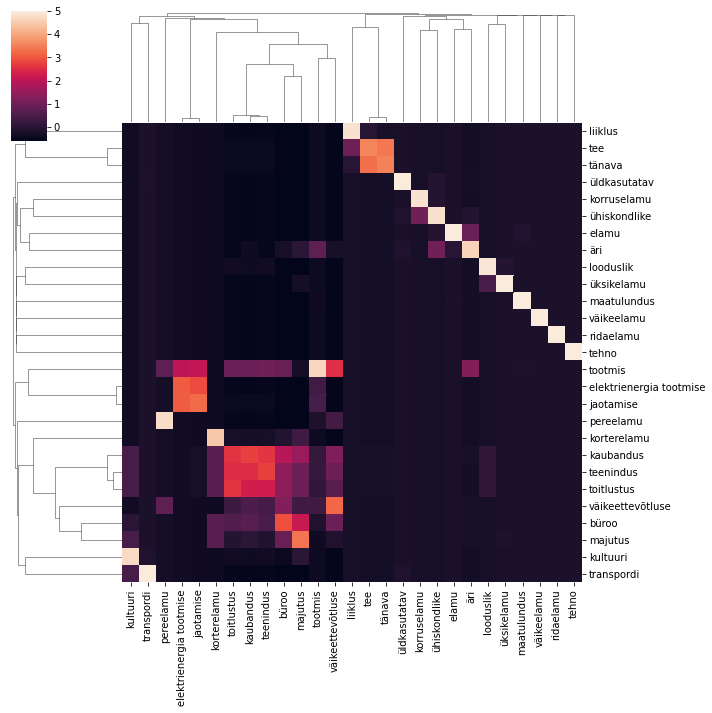

In [436]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

sns.clustermap(normalized_z)

# Show the graph
plt.show()

In [430]:
z2

,büroo,elamu,elektrienergia tootmise,jaotamise,kaubandus,korruselamu,korterelamu,kultuuri,liiklus,looduslik,maatulundus,majutus,pereelamu,ridaelamu,tee,teenindus,tehno,toitlustus,tootmis,transpordi,tänava,väikeelamu,väikeettevõtluse,äri,ühiskondlike,üksikelamu,üldkasutatav
büroo,0,0,0,0,15,0,3,1,0,0,0,9,0,0,0,12,0,12,9,0,0,0,11,2,0,0,0
elamu,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,28,1,0,0
elektrienergia tootmise,0,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0
jaotamise,0,0,35,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,26,0,0,0,0,0,0,0,0
kaubandus,15,0,0,1,0,0,3,2,0,2,0,7,0,0,1,37,0,34,18,0,1,0,13,2,0,0,0
korruselamu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
korterelamu,3,0,0,0,3,0,0,0,0,0,0,3,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0
kultuuri,1,0,0,0,2,0,0,0,0,0,0,2,0,0,0,2,0,2,0,2,0,0,0,0,0,0,0
liiklus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0,0
looduslik,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,4,0


ValueError: ignored

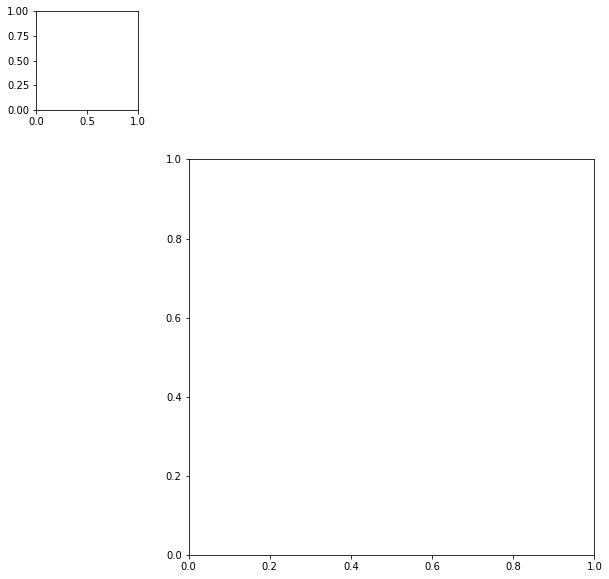

In [429]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
# Data set
df = z2
 
# Standardize or Normalize every column in the figure
# Standardize:
sns.clustermap(df, standard_scale=1)
plt.show(
)
# Normalize
sns.clustermap(df, z_score=1)
plt.show()